In [1]:
run 'init.ipynb'

In [2]:
N, K, a, b = sp.symbols('N K a b')

In [3]:
Ndot = a * (K - N) / K * N - b * N

In [4]:
eq = sp.solve(Ndot, N)

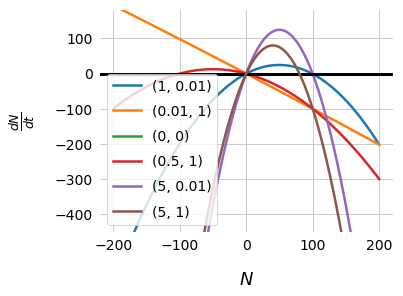

In [47]:
Ndot_np = sp.lambdify((N, a, b, K), Ndot)

def plot(ax, a, b, K=100, N_lim=200, ylim=(-450, 180)):
    ax.axhline(0, c='black')
    N = np.linspace(-N_lim, N_lim, 1000)
    ax.plot(N, Ndot_np(N, a, b, K), label=f'({a:g}, {b:g})')
    ax.set_xlabel(r'$N$')
    ax.set_ylabel(r'$\frac{dN}{dt}$')
    ax.set_ylim(ylim)

fig, ax = plt.subplots()
plot(ax, 1, 0.01)
plot(ax, 0.01, 1)
plot(ax, 0, 0)
plot(ax, 0.5, 1)
plot(ax, 5, 0.01)
plot(ax, 5, 1)
ax.legend();

In [34]:
KK = 4.2
alpha = 6.44/100
beta  = 0.27/100

fixed_point = eq[1]
fixed_point.evalf(7, dict(K=KK, a=alpha, b=beta))

In [35]:
from scipy.integrate import solve_ivp

t_0 = 2010
t_f = 2200
N_0 = 1.687440

def f(t, NN):
    return Ndot_np(NN, alpha, beta, KK)

sol = solve_ivp(f, (t_0, t_f), [N_0], t_eval=np.linspace(t_0, t_f, 100));

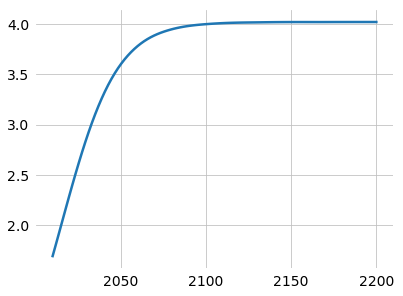

In [36]:
plt.plot(sol.t, sol.y[0,:]);

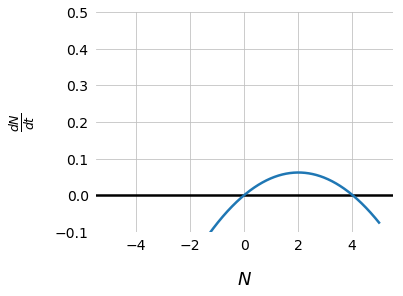

In [48]:
fig, ax = plt.subplots()
plot(ax, alpha, beta, KK, 5, (-0.1, 0.5))